In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pathlib
import sys

In [5]:
MODE = "local"
import platform

if platform.system() == "Windows":
    DATA_PATH = pathlib.Path("X:\jbreda\learning_project\data")
else:
    if MODE == "cup":
        DATA_PATH = pathlib.Path("/Volumes/brody/jbreda/learning_project/data")
    elif MODE == "local":
        DATA_PATH = pathlib.Path(
            "/Users/jessbreda/Desktop/github/animal-learning/data/raw"
        )
F_NAME = "rat_behavior.csv"
RAT_DF = pd.read_csv(DATA_PATH / F_NAME)
RAT_DF["violation"] = RAT_DF.hit.isnull()
RAT_DF.subject_id = RAT_DF.subject_id.astype("string")
RAT_DF["n_trial"] = RAT_DF.index
RAT_DF["training_stage_cat"] = RAT_DF["training_stage"].astype("category")
RAT_DF["delay"] = RAT_DF.delay.round(2)

In [28]:
animal_id = "W088"
sub_df = (
    RAT_DF.query("subject_id == @animal_id")
    .groupby(["s_a", "s_b"])
    .agg(count=("s_b", "size"))
    .reset_index()
)

In [7]:
def plot_sa_sb_counts_single_animal(df, animal_id, ax):
    sub_df = (
        df.query("subject_id == @animal_id")
        .groupby(["s_a", "s_b"])
        .agg(count=("s_b", "size"))
        .reset_index()
    )
    if ax is None:
        fig, ax = plt.subplots(figsize=(6, 5))

    scatter = ax.scatter(
        data=sub_df,
        x="s_a",
        y="s_b",
        marker=",",
        s=100,
        c="count",
        cmap="flare",
        edgecolors="gray",
    )

    cbar = plt.colorbar(scatter, ax=ax)
    cbar.set_label("Number of trials")

    _ = ax.set(xlabel="Stimulus A", ylabel="Stimulus B", title=animal_id)

    return None

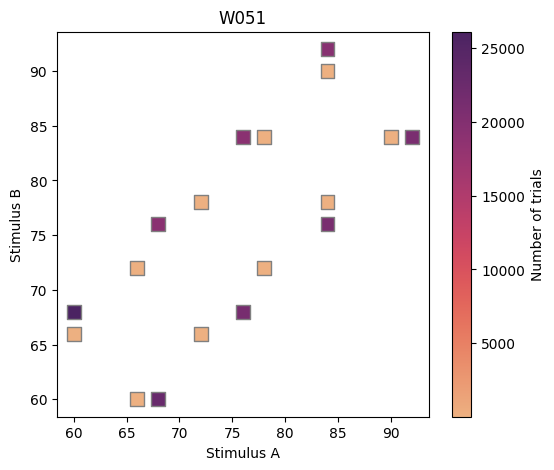

In [39]:
plot_sa_sb_counts_single_animal(RAT_DF, "W051", ax=None)

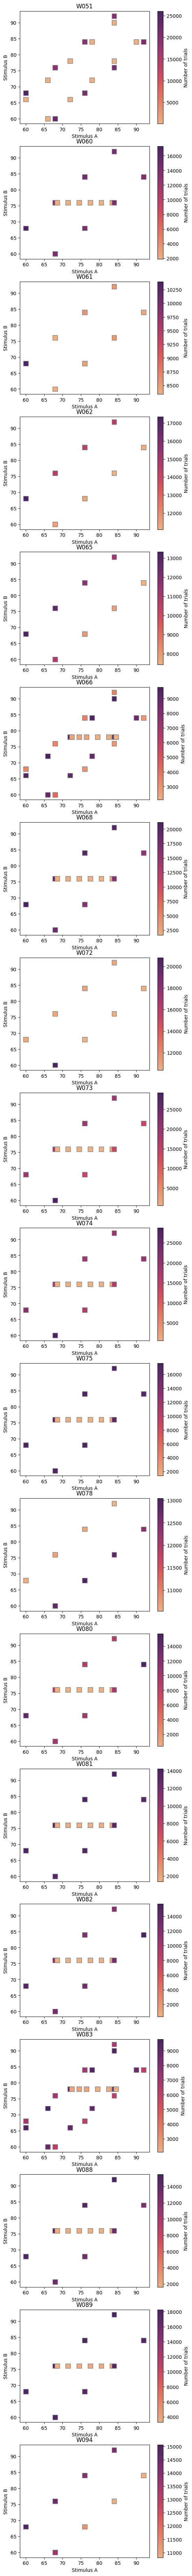

In [45]:
animalL = RAT_DF.subject_id.unique().tolist()
n_animals = len(animalL)

fig, ax = plt.subplots(nrows=n_animals, ncols=1, figsize=(6, 5 * n_animals))

for i, animal_id in enumerate(animalL):
    plot_sa_sb_counts_single_animal(RAT_DF, animal_id, ax=ax[i])

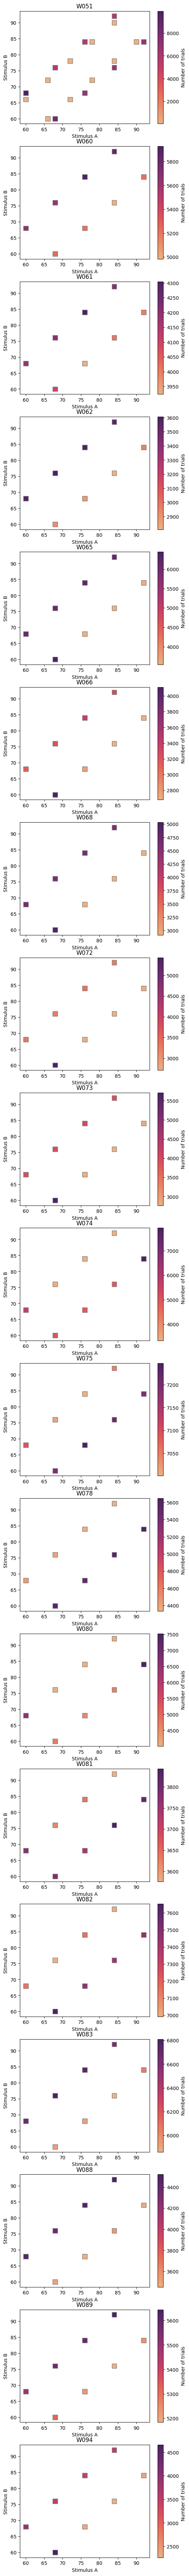

In [8]:
animalL = RAT_DF.subject_id.unique().tolist()
n_animals = len(animalL)

fig, ax = plt.subplots(nrows=n_animals, ncols=1, figsize=(6, 5 * n_animals))

for i, animal_id in enumerate(animalL):
    plot_sa_sb_counts_single_animal(RAT_DF.query("session < 200"), animal_id, ax=ax[i])